Numerical simulations are commonly used to model phenomena in astrophysics. There are many different simulation codes that model a variety of physics, from galaxy formation to star and planet formation, from planetary atmospheres to black hole mergers, from supernova explosions to the accretion disks of super massive black holes.

Many codes have analysis software specificaly built for analyzing outputs from those simulations. There are a few more general analysis tools 
pynbody(https://pynbody.github.io) and yt (https://yt-project.org)
since yt is the most versitile I will use it in this notebook it can be installed with 
$ conda install --channel conda-forge yt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.load_sample()

One can see which sample datasets are available at: https://yt-project.org/data
or alternatively by running: yt.sample_data.api.get_data_registry_table()


In [2]:
ds = yt.load_sample('medium_tipsy')

/Users/ari/miniforge3/lib/python3.10/site-packages/yt/sample_data/api.py:149: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  warn(
yt : [INFO     ] 2024-06-04 14:53:08,651 Sample dataset found in '/Users/ari/Documents/python/bootcamp_notebooks/medium_tipsy/g1536.00256'
yt : [INFO     ] 2024-06-04 14:53:08,828 Parameters: current_time              = 1.0875498039420904e+17 s
yt : [INFO     ] 2024-06-04 14:53:08,828 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-06-04 14:53:08,829 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2024-06-04 14:53:08,829 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2024-06-04 14:53:08,829 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2024-06-04 14:53:08,830 Parameters: current_redshift          = 1.9978842331821651
yt : [INFO     ] 2024-06-04 14:53:08,830 Parameters: ome

In [3]:
print(type(ds))
ds.field_list

yt : [INFO     ] 2024-06-04 14:57:12,766 Allocating for 4.206e+06 particles


<class 'yt.frontends.tipsy.data_structures.TipsyDataset'>


Loading particle index: 100%|█████████████████| 12/12 [00:00<00:00, 2851.81it/s]


[('DarkMatter', 'Coordinates'),
 ('DarkMatter', 'Epsilon'),
 ('DarkMatter', 'FeMassFrac'),
 ('DarkMatter', 'HI'),
 ('DarkMatter', 'HeI'),
 ('DarkMatter', 'HeII'),
 ('DarkMatter', 'Mass'),
 ('DarkMatter', 'MassHot'),
 ('DarkMatter', 'OxMassFrac'),
 ('DarkMatter', 'Phi'),
 ('DarkMatter', 'Tinc'),
 ('DarkMatter', 'Velocities'),
 ('DarkMatter', 'den'),
 ('DarkMatter', 'denu'),
 ('DarkMatter', 'igasorder'),
 ('DarkMatter', 'iord'),
 ('DarkMatter', 'massform'),
 ('DarkMatter', 'timeform'),
 ('DarkMatter', 'u'),
 ('DarkMatter', 'uDotFB'),
 ('DarkMatter', 'uHot'),
 ('Gas', 'Coordinates'),
 ('Gas', 'Density'),
 ('Gas', 'Epsilon'),
 ('Gas', 'FeMassFrac'),
 ('Gas', 'HI'),
 ('Gas', 'HeI'),
 ('Gas', 'HeII'),
 ('Gas', 'Mass'),
 ('Gas', 'MassHot'),
 ('Gas', 'Metals'),
 ('Gas', 'OxMassFrac'),
 ('Gas', 'Phi'),
 ('Gas', 'Temperature'),
 ('Gas', 'Tinc'),
 ('Gas', 'Velocities'),
 ('Gas', 'den'),
 ('Gas', 'denu'),
 ('Gas', 'igasorder'),
 ('Gas', 'iord'),
 ('Gas', 'massform'),
 ('Gas', 'smoothing_length'),


<class 'unyt.array.unyt_array'>


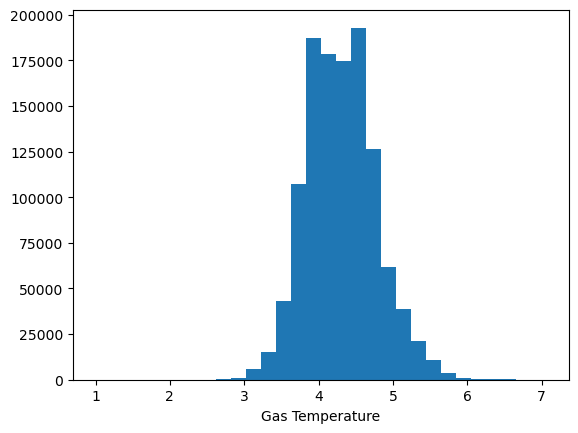

In [4]:
ad = ds.all_data()
gas_rho = ad[('Gas','Density')]
gas_temp = ad[('Gas','Temperature')]
_ = plt.hist(np.log10(gas_temp),bins=30)
plt.xlabel('Gas Temperature')
print(type(gas_rho))


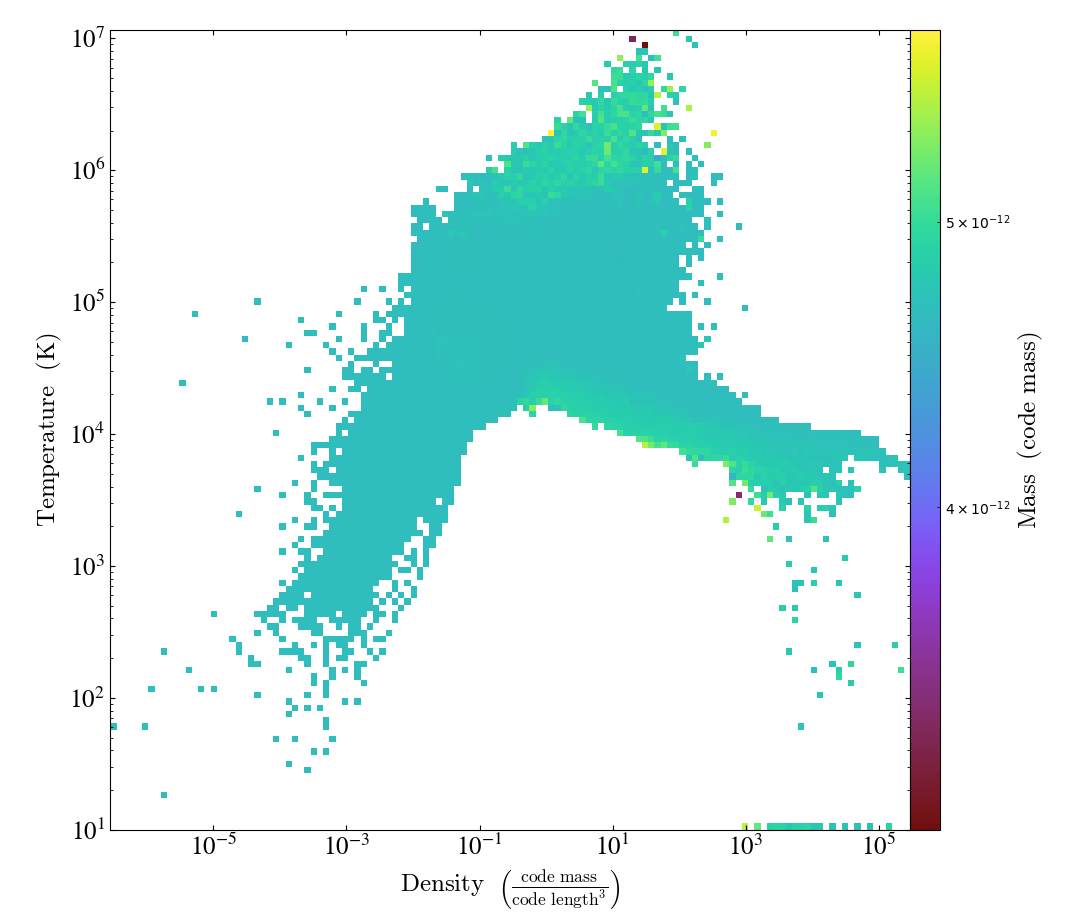

In [5]:
plot = yt.PhasePlot(ad, ("Gas", "Density"), ("Gas", "Temperature"),("Gas","Mass"))
plot.show()


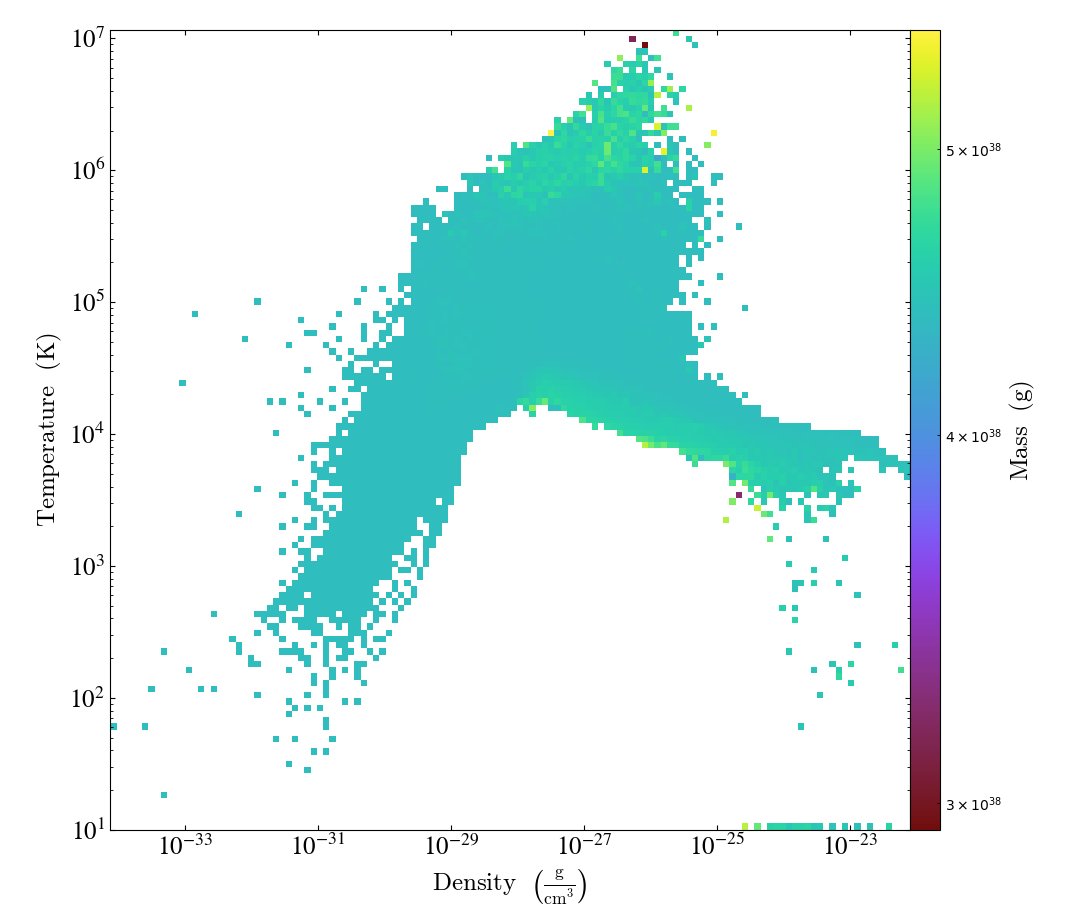

In [6]:
plot = yt.PhasePlot(ad, ("gas", "density"), ("gas", "temperature"), ("gas", "mass"))
plot.show()

In [7]:
ds.derived_field_list

[('DarkMatter', ''),
 ('DarkMatter', 'Coordinates'),
 ('DarkMatter', 'Epsilon'),
 ('DarkMatter', 'FeMassFrac'),
 ('DarkMatter', 'Fe_fraction'),
 ('DarkMatter', 'HI'),
 ('DarkMatter', 'H_fraction'),
 ('DarkMatter', 'HeI'),
 ('DarkMatter', 'HeII'),
 ('DarkMatter', 'He_fraction'),
 ('DarkMatter', 'He_p2_fraction'),
 ('DarkMatter', 'Mass'),
 ('DarkMatter', 'MassHot'),
 ('DarkMatter', 'O_fraction'),
 ('DarkMatter', 'OxMassFrac'),
 ('DarkMatter', 'Phi'),
 ('DarkMatter', 'Tinc'),
 ('DarkMatter', 'Velocities'),
 ('DarkMatter', 'den'),
 ('DarkMatter', 'denu'),
 ('DarkMatter', 'igasorder'),
 ('DarkMatter', 'iord'),
 ('DarkMatter', 'massform'),
 ('DarkMatter', 'particle_angular_momentum'),
 ('DarkMatter', 'particle_angular_momentum_magnitude'),
 ('DarkMatter', 'particle_angular_momentum_x'),
 ('DarkMatter', 'particle_angular_momentum_y'),
 ('DarkMatter', 'particle_angular_momentum_z'),
 ('DarkMatter', 'particle_mass'),
 ('DarkMatter', 'particle_ones'),
 ('DarkMatter', 'particle_position'),
 ('Dar

yt : [INFO     ] 2024-06-04 15:07:53,145 xlim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 15:07:53,145 ylim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 15:07:53,148 xlim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 15:07:53,148 ylim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 15:07:53,151 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



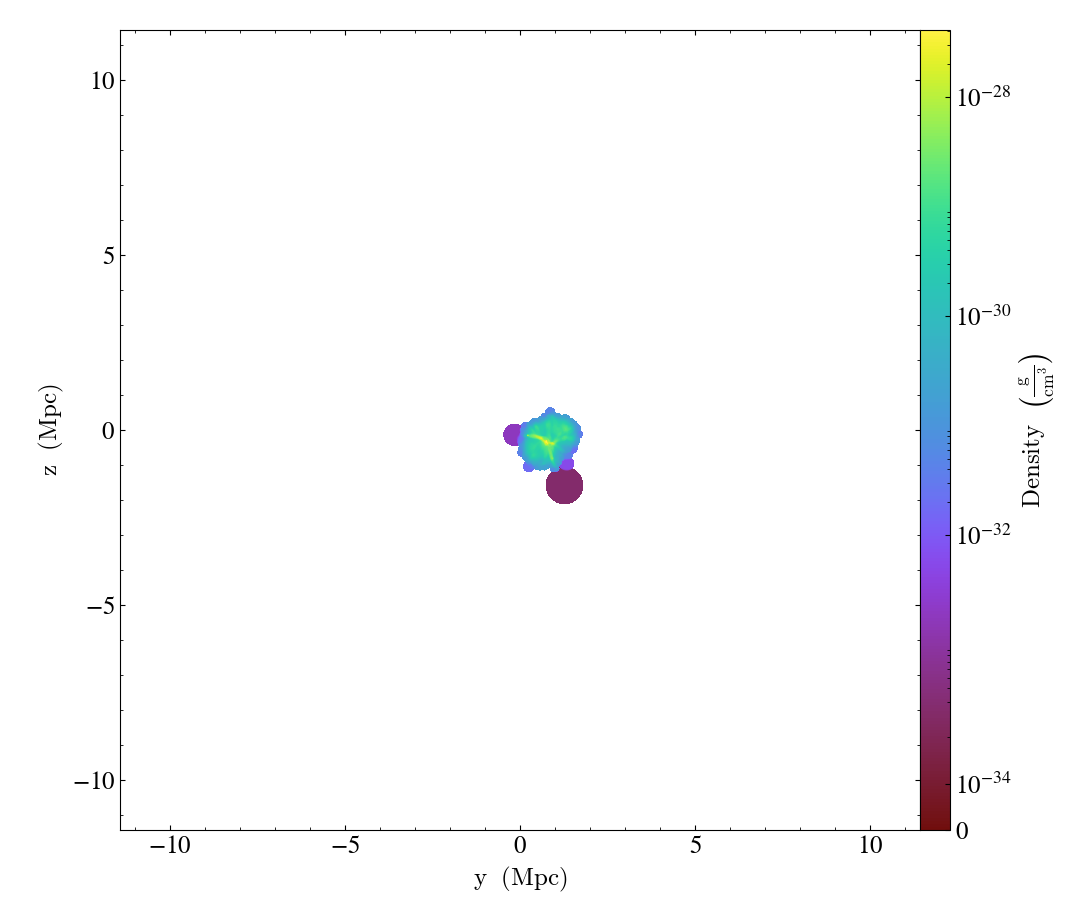

In [8]:
yt.SlicePlot(ds, "x", ("gas", "density"))

yt : [INFO     ] 2024-06-04 15:09:42,393 xlim = -0.032827 0.032827
yt : [INFO     ] 2024-06-04 15:09:42,394 ylim = -0.032827 0.032827
yt : [INFO     ] 2024-06-04 15:09:42,396 xlim = -0.032827 0.032827
yt : [INFO     ] 2024-06-04 15:09:42,396 ylim = -0.032827 0.032827
yt : [INFO     ] 2024-06-04 15:09:42,397 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



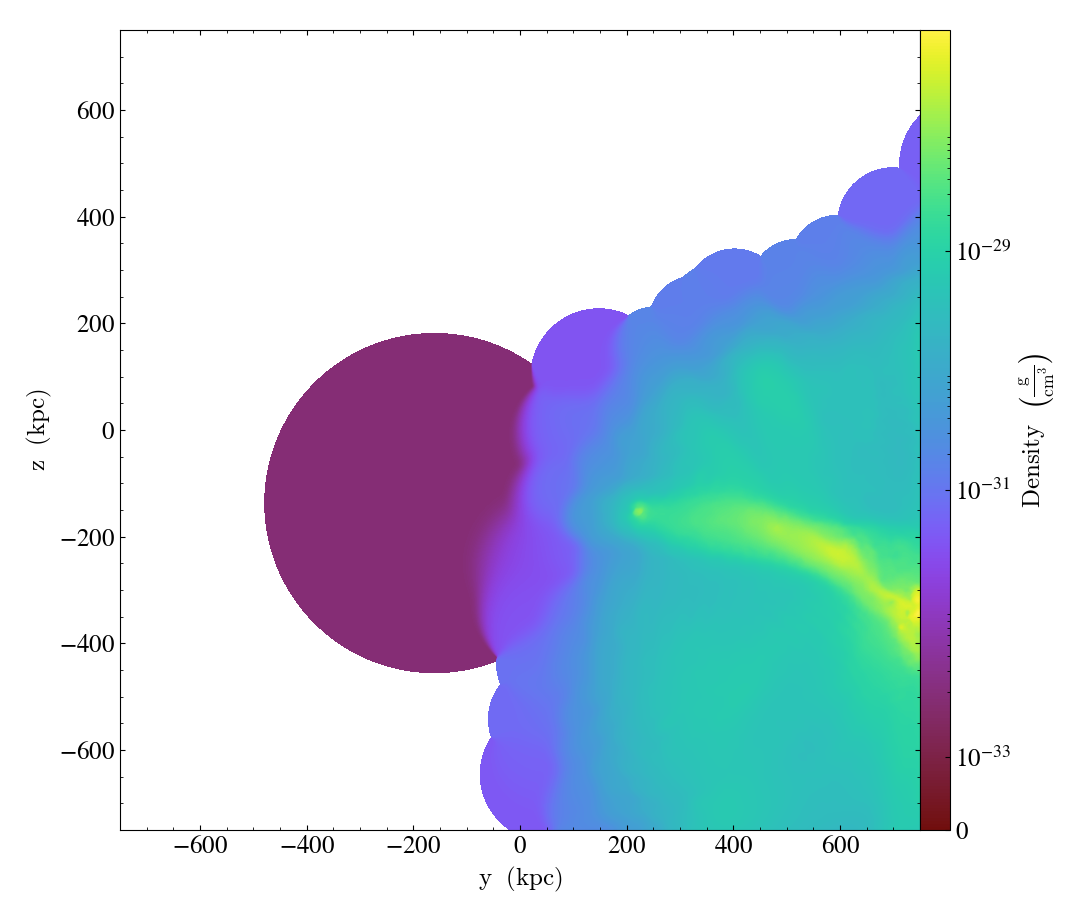

In [9]:
yt.SlicePlot(ds, "x", ("gas", "density"), width=(1500.0, "kpc"))

yt : [INFO     ] 2024-06-04 15:10:37,448 max value is 8.01793e-23 at 0.0081559047102928 0.0319247506558895 -0.0120307467877865
yt : [INFO     ] 2024-06-04 15:10:37,482 xlim = 0.020982 0.042867
yt : [INFO     ] 2024-06-04 15:10:37,483 ylim = -0.022973 -0.001088
yt : [INFO     ] 2024-06-04 15:10:37,484 xlim = 0.020982 0.042867
yt : [INFO     ] 2024-06-04 15:10:37,485 ylim = -0.022973 -0.001088
yt : [INFO     ] 2024-06-04 15:10:37,485 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



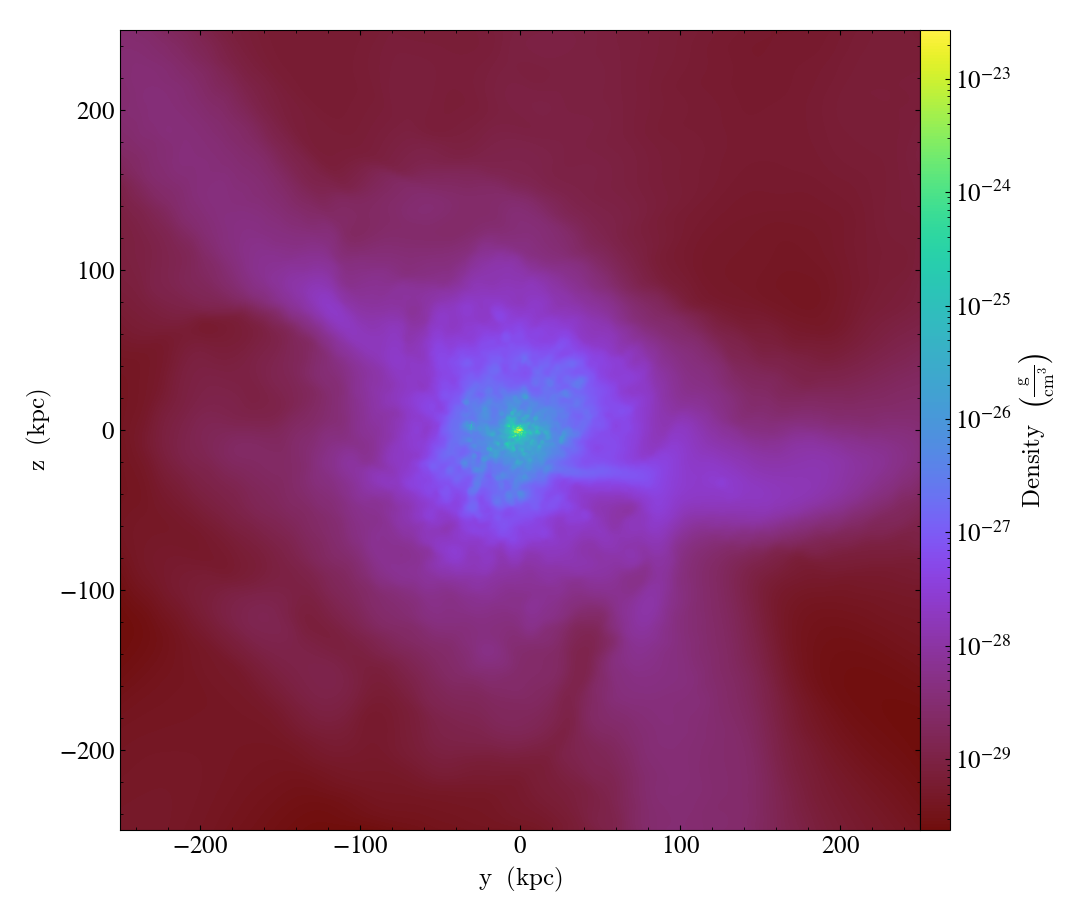

In [10]:
slc = yt.SlicePlot(ds, "x", ("gas", "density"), center ="max", width=(500.0, "kpc"))
slc.show()


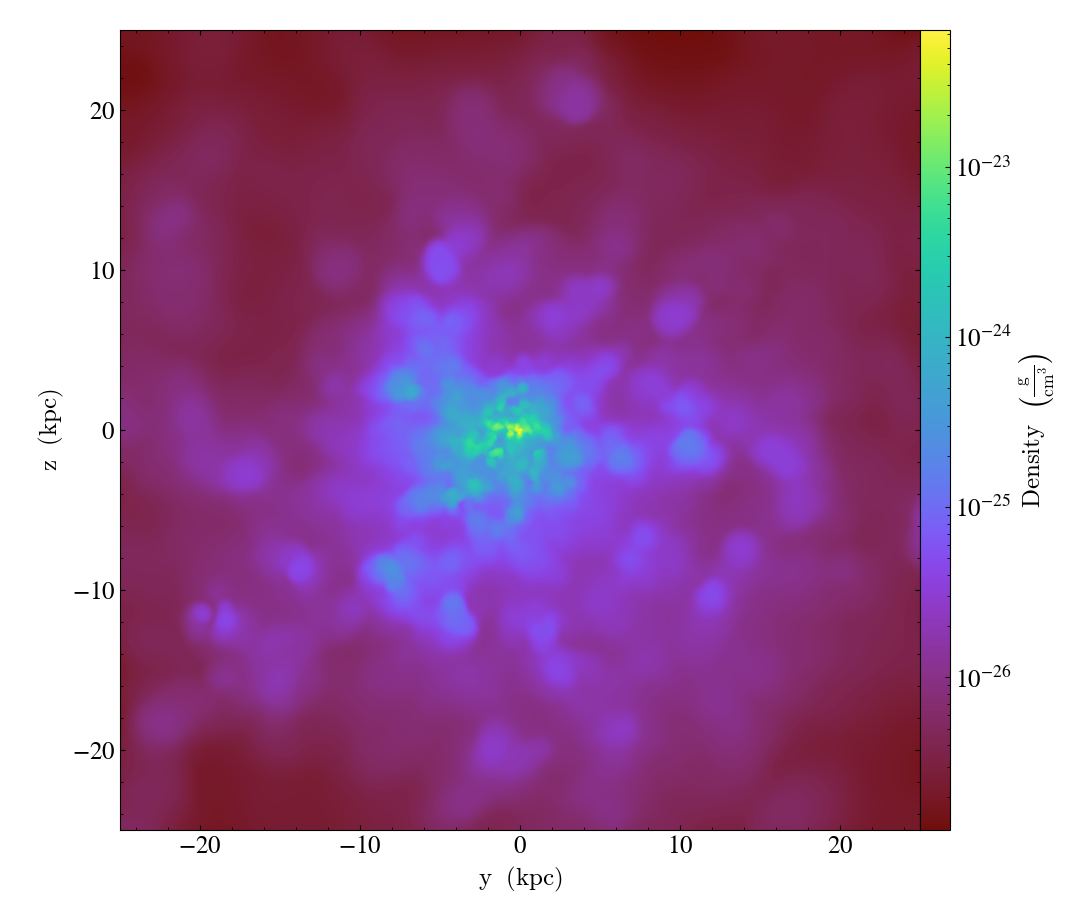

In [11]:
slc.set_width([50,'kpc'])
slc.show()

yt : [INFO     ] 2024-06-04 15:11:29,811 max value is 8.01793e-23 at 0.0081559047102928 0.0319247506558895 -0.0120307467877865
yt : [INFO     ] 2024-06-04 15:11:30,212 xlim = 0.030831 0.033019
yt : [INFO     ] 2024-06-04 15:11:30,213 ylim = -0.013125 -0.010937
yt : [INFO     ] 2024-06-04 15:11:30,214 xlim = 0.030831 0.033019
yt : [INFO     ] 2024-06-04 15:11:30,214 ylim = -0.013125 -0.010937
yt : [INFO     ] 2024-06-04 15:11:30,215 Making a fixed resolution buffer of (('gas', 'H_fraction')) 800 by 800



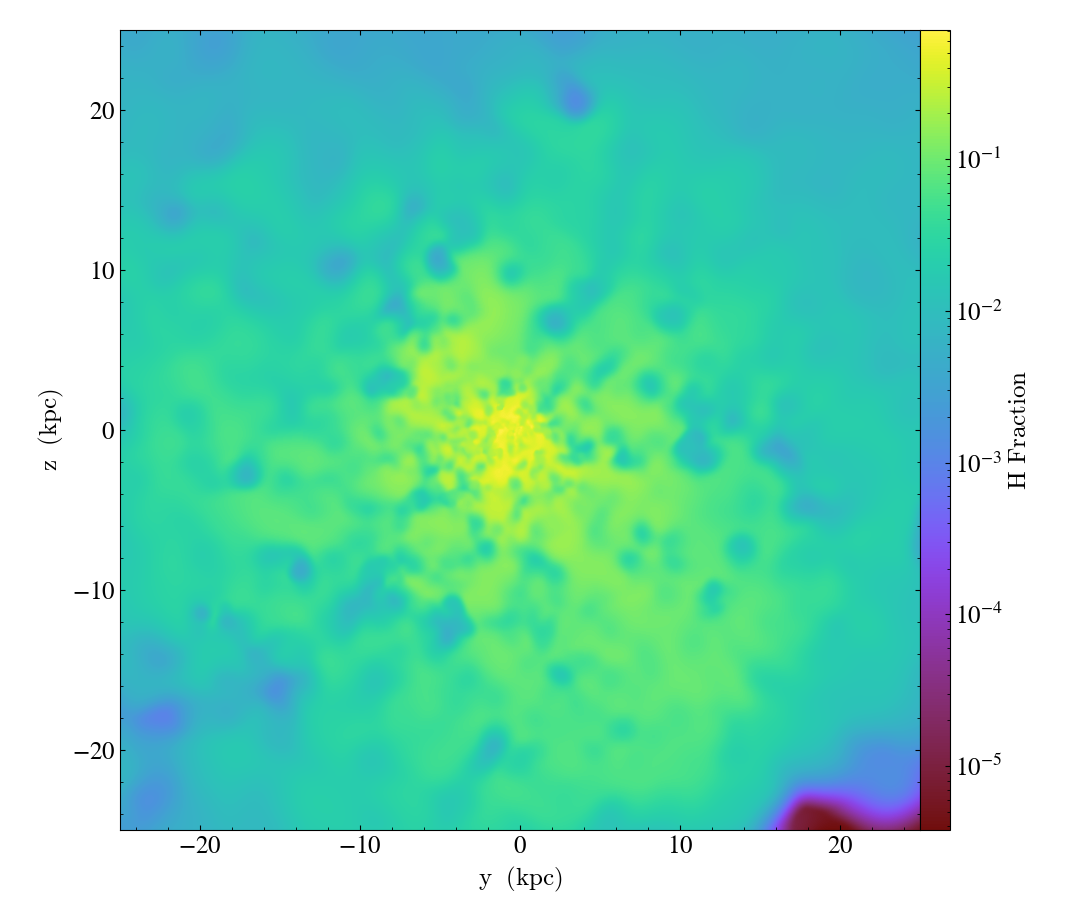

In [12]:
slc = yt.SlicePlot(ds, "x", ('gas', 'H_fraction'), center ="max", width=(50.0, "kpc"))
slc.show()

yt : [INFO     ] 2024-06-04 15:12:22,522 max value is 8.01793e-23 at 0.0081559047102928 0.0319247506558895 -0.0120307467877865
yt : [INFO     ] 2024-06-04 15:12:22,524 xlim = 0.030831 0.033019
yt : [INFO     ] 2024-06-04 15:12:22,525 ylim = -0.013125 -0.010937
yt : [INFO     ] 2024-06-04 15:12:22,526 xlim = 0.030831 0.033019
yt : [INFO     ] 2024-06-04 15:12:22,526 ylim = -0.013125 -0.010937
yt : [INFO     ] 2024-06-04 15:12:22,527 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



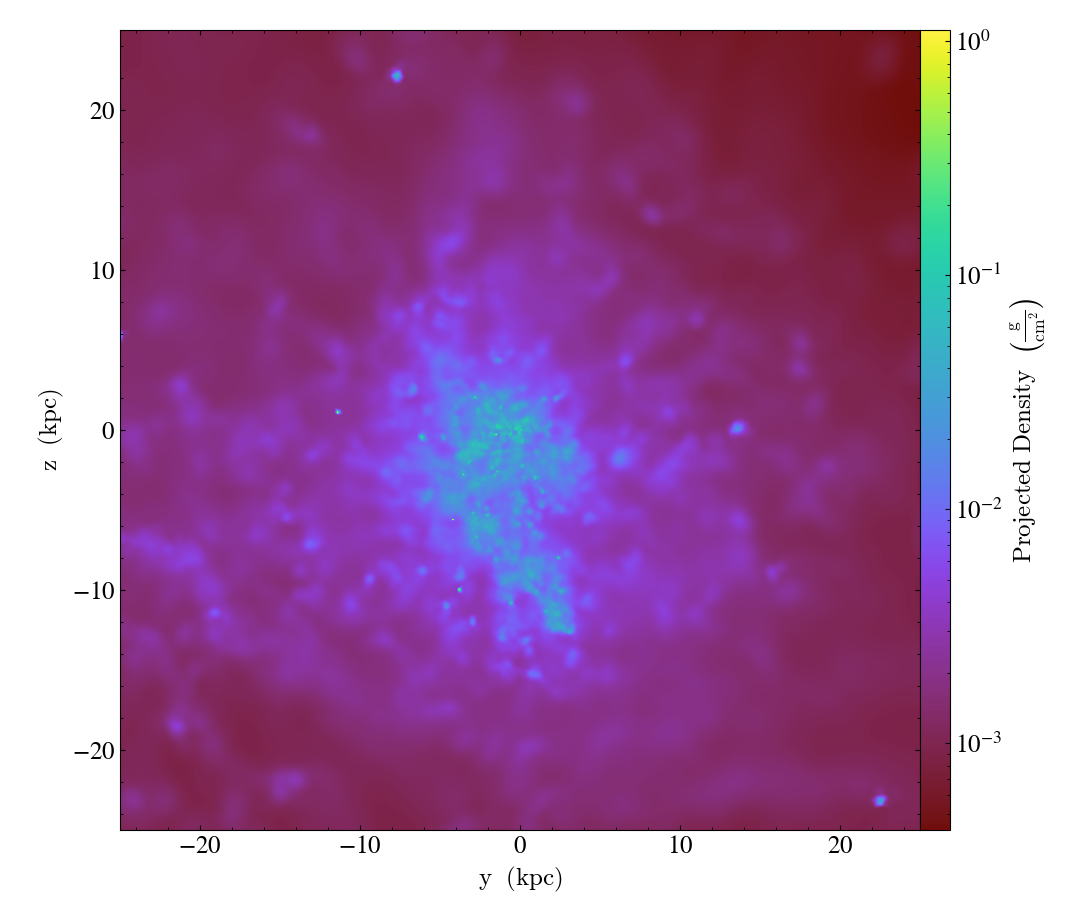

In [13]:
pp = yt.ProjectionPlot(ds,'x',("gas", "density"), center ="max", width=(50,'kpc'))
pp.show()

yt : [INFO     ] 2024-06-04 15:14:54,814 xlim = -0.250000 0.250000
yt : [INFO     ] 2024-06-04 15:14:54,816 ylim = -0.250000 0.250000
yt : [INFO     ] 2024-06-04 15:14:54,820 xlim = -0.250000 0.250000
yt : [INFO     ] 2024-06-04 15:14:54,821 ylim = -0.250000 0.250000
yt : [INFO     ] 2024-06-04 15:14:54,822 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



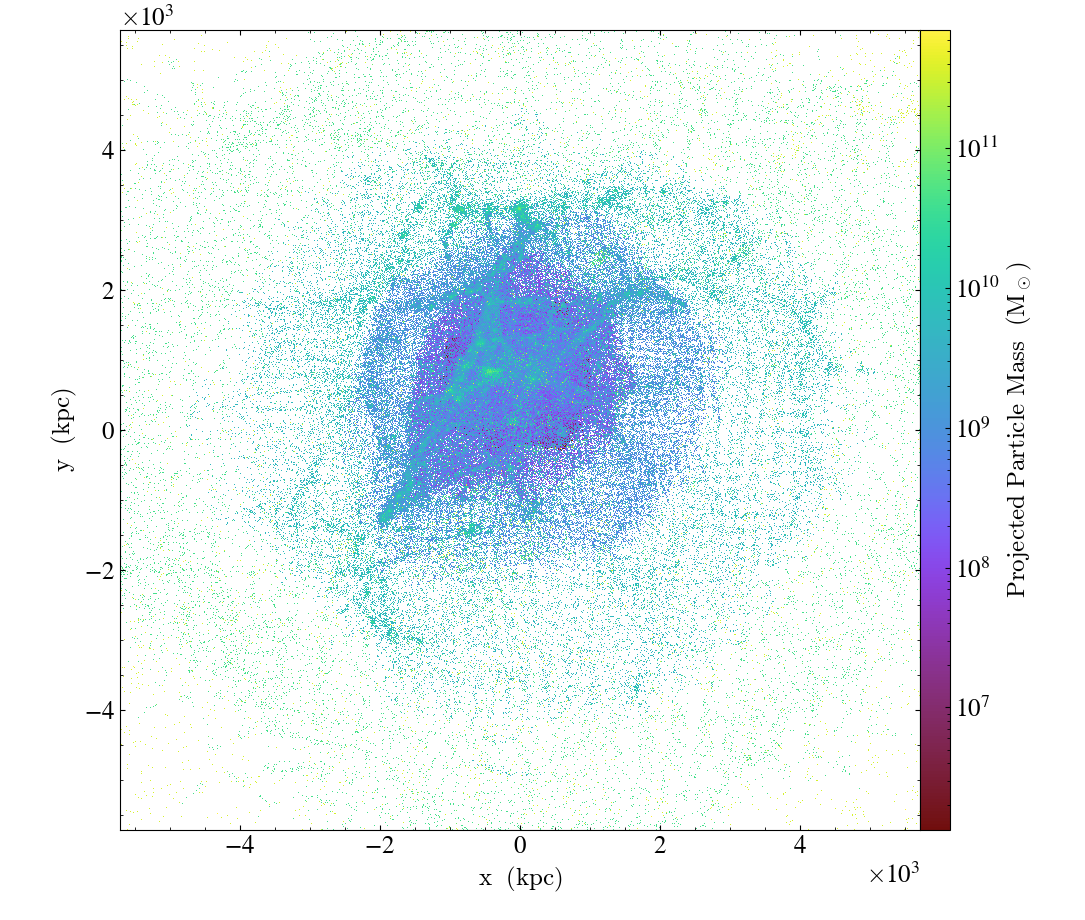

In [14]:
p = yt.ParticlePlot(ds,
    ("all", "particle_position_x"),
    ("all", "particle_position_y"),
    ("all", "particle_mass"),width=(0.5, 0.5))

# pick some appropriate units
p.set_axes_unit("kpc")
p.set_unit(("all", "particle_mass"), "Msun")

In [16]:
ds = yt.load_sample('DICEGalaxyDisk')

/Users/ari/miniforge3/lib/python3.10/site-packages/yt/sample_data/api.py:149: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  warn(
yt : [INFO     ] 2024-06-04 15:20:23,024 'DICEGalaxyDisk' is not available locally. Looking up online.
yt : [INFO     ] 2024-06-04 15:20:23,025 Downloading from https://yt-project.org/data/DICEGalaxyDisk.tar.gz
100%|█████████████████████████████████████| 82.5M/82.5M [00:00<00:00, 64.3GB/s]
yt : [INFO     ] 2024-06-04 15:20:47,299 Untaring downloaded file to '/Users/ari/Documents/python/bootcamp_notebooks'
yt : [INFO     ] 2024-06-04 15:20:50,413 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-04 15:20:50,413 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-06-04 15:20:50,413 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-04 15:20:50,414 Parameters: domain_right_edge         = [1. 1.

In [17]:
ds.field_list

yt : [WARNING  ] 2024-06-04 15:21:25,806 Detected 2 extra particle fields assuming kind `double`. Consider using the `extra_particle_fields` keyword argument if you have unexpected behavior.
yt : [WARNING  ] 2024-06-04 15:21:26,758 This output has no cooling fields


[('all', 'particle_extra_field_1'),
 ('all', 'particle_extra_field_2'),
 ('all', 'particle_identity'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('gravity', 'x-acceleration'),
 ('gravity', 'y-acceleration'),
 ('gravity', 'z-acceleration'),
 ('io', 'particle_extra_field_1'),
 ('io', 'particle_extra_field_2'),
 ('io', 'particle_identity'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('nbody', 'particle_extra_field_1'),
 ('nbody', 'particle_extra_field_2'),
 ('nbody', 'particle_identity'),
 ('nbody', 'particle_mass'),
 ('nbody', 'particle_position_x'),
 ('nbody

In [18]:
ad = ds.all_data()

yt : [INFO     ] 2024-06-04 15:28:05,085 xlim = 0.468750 0.531250
yt : [INFO     ] 2024-06-04 15:28:05,086 ylim = 0.468750 0.531250
yt : [INFO     ] 2024-06-04 15:28:05,087 xlim = 0.468750 0.531250
yt : [INFO     ] 2024-06-04 15:28:05,087 ylim = 0.468750 0.531250
yt : [INFO     ] 2024-06-04 15:28:05,088 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800



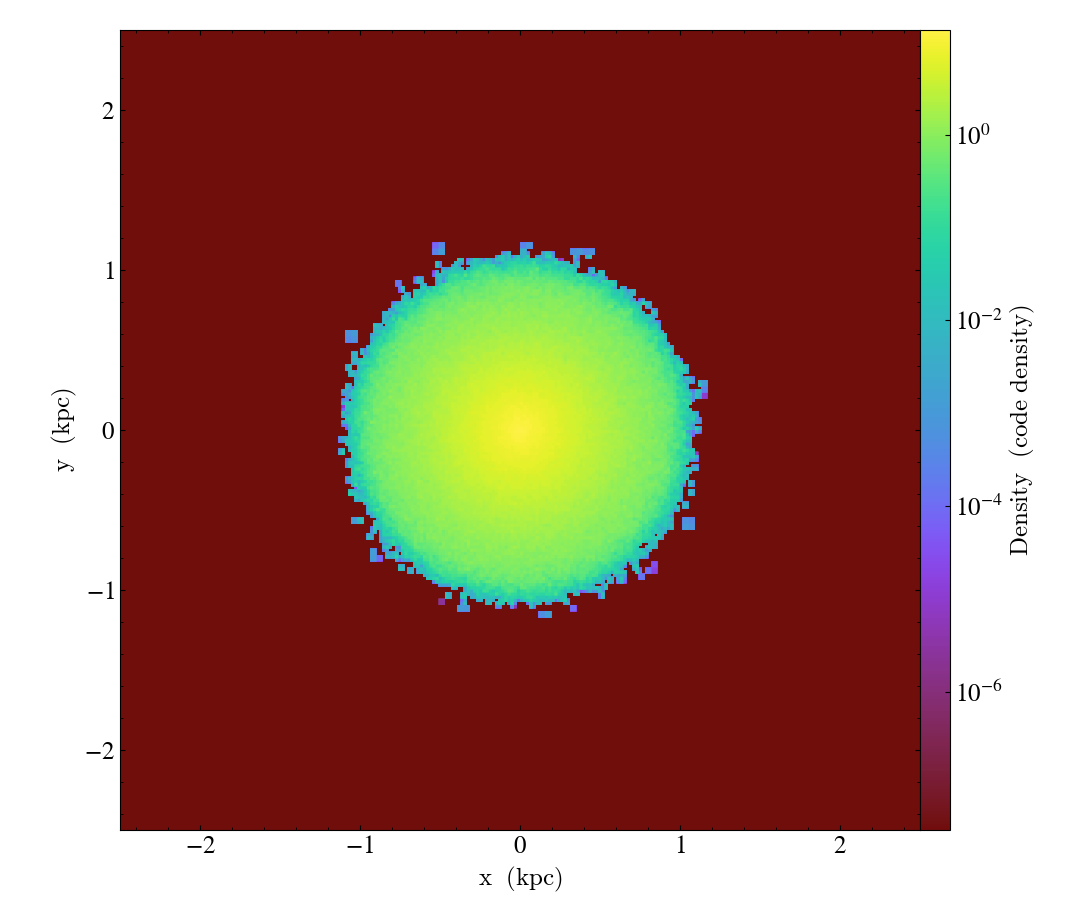

In [27]:
yt.SlicePlot(ds,'z',('ramses','Density'),width=(5,'kpc'))

In [28]:
rho = ad[('ramses','Density')]

In [29]:
rho.max()

unyt_quantity(13.51228187, 'code_density')

In [30]:
rho.min()

unyt_quantity(3.22618687e-08, 'code_density')

yt : [INFO     ] 2024-06-04 15:33:35,281 xlim = 0.250000 0.750000
yt : [INFO     ] 2024-06-04 15:33:35,282 ylim = 0.250000 0.750000
yt : [INFO     ] 2024-06-04 15:33:35,287 xlim = 0.250000 0.750000
yt : [INFO     ] 2024-06-04 15:33:35,288 ylim = 0.250000 0.750000
yt : [INFO     ] 2024-06-04 15:33:35,289 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



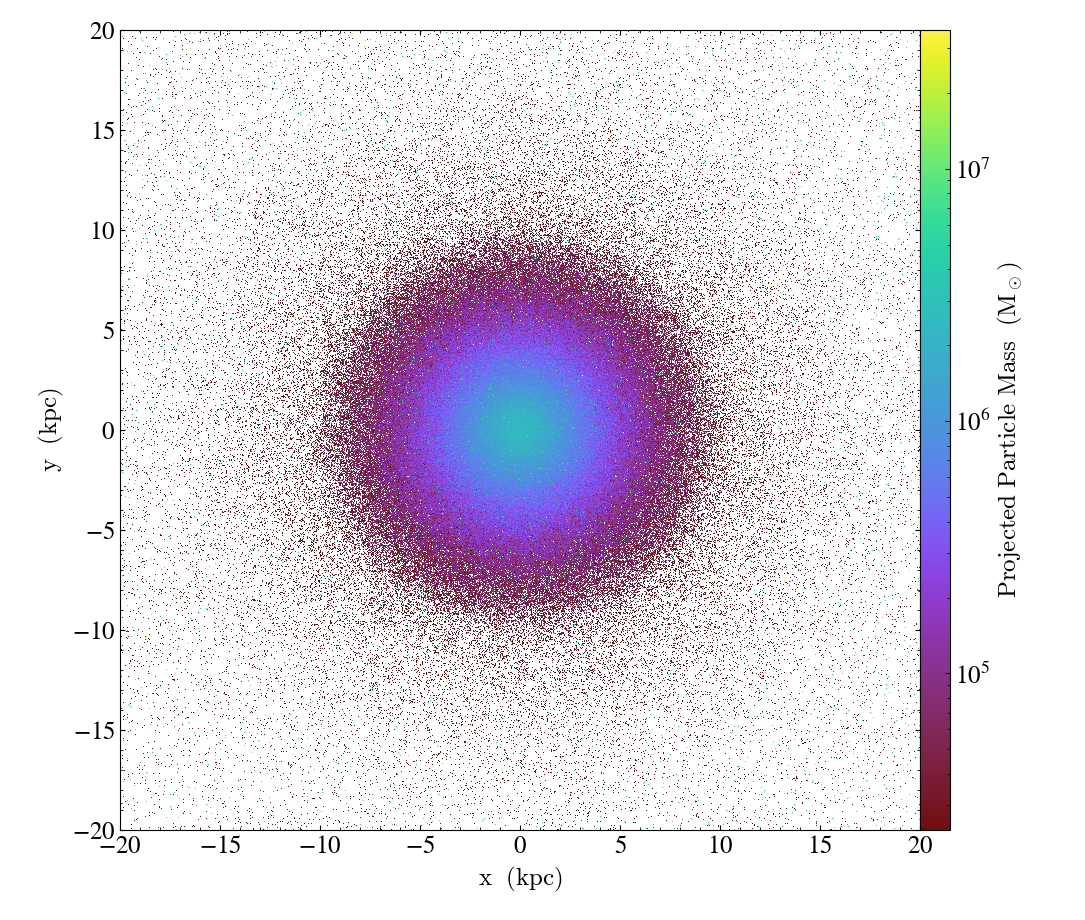

In [31]:
p = yt.ParticlePlot(ds,
    ("all", "particle_position_x"),
    ("all", "particle_position_y"),
    ("all", "particle_mass"),width=(0.5, 0.5))

# pick some appropriate units
p.set_axes_unit("kpc")
p.set_unit(("all", "particle_mass"), "Msun")